# Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集）进行分类

In [463]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
from sklearn.metrics import log_loss  

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## 读取数据 & 数据探索

In [464]:
# 读取数据
# path to where the data lies
dpath = './'
train = pd.read_csv(dpath +"diabetes.csv")
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [465]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [466]:
train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [467]:
## 各属性的统计特性
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 离群点检查

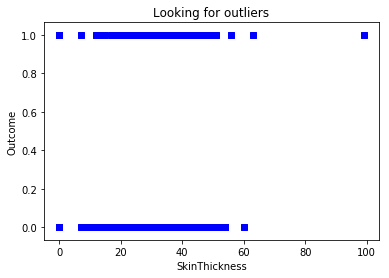

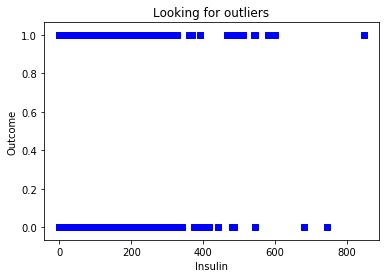

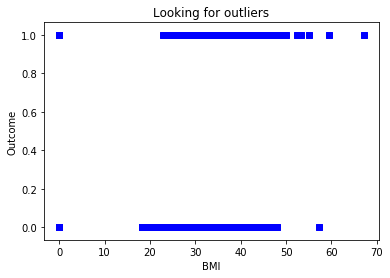

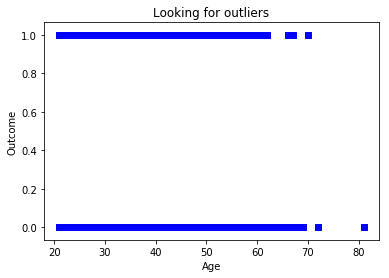

In [468]:
# 离群点检测（outliers）
plt.scatter(train.SkinThickness, train.Outcome, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("SkinThickness")
plt.ylabel("Outcome")
plt.show()

#剔除离群点
train = train[train.SkinThickness < 70]
temp = train.reindex()

# 离群点检测（outliers）
plt.scatter(train.Insulin, train.Outcome, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("Insulin")
plt.ylabel("Outcome")
plt.show()
#剔除离群点
train = train[train.Insulin < 680]
temp = train.reindex()

# 离群点检测（outliers）
plt.scatter(train.BMI, train.Outcome, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("BMI")
plt.ylabel("Outcome")
plt.show()
#剔除离群点
train = train[train.BMI < 65]
temp = train.reindex()

# 离群点检测（outliers）
plt.scatter(train.Age, train.Outcome, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.show()
#剔除离群点
train = train[train.Age < 80]
temp = train.reindex()

## 特征工程

In [469]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,3.854331,120.519685,69.027559,20.339895,77.199475,31.920604,0.469676,33.132546,0.347769
std,3.369655,31.717217,19.356685,15.704606,107.435570,7.771173,0.325657,11.585006,0.476575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,24.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.626750,40.750000,1.000000
max,17.000000,199.000000,122.000000,63.000000,600.000000,59.400000,2.420000,72.000000,1.000000


In [470]:
for a in train.columns:
    print('%s = %d'% (a ,len(train[train[a]==0])))
    #m=train[a].mean
    #train[a].replace({0:m},inplace = True)

Pregnancies = 109
Glucose = 5
BloodPressure = 35
SkinThickness = 227
Insulin = 373
BMI = 11
DiabetesPedigreeFunction = 0
Age = 0
Outcome = 497


### 中位数填充0位置

In [471]:
a=117
train.Glucose.replace({0:a},inplace = True)
a=72
train.BloodPressure.replace({0 : a},inplace = True)
a=23
train.SkinThickness.replace({0 : a},inplace = True)
a=24
train.Insulin.replace({0 : a},inplace = True)
a=32
train.BMI.replace({0 : a},inplace = True)

In [472]:
train.info()

#type(train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 762 non-null int64
Glucose                     762 non-null int64
BloodPressure               762 non-null int64
SkinThickness               762 non-null int64
Insulin                     762 non-null int64
BMI                         762 non-null float64
DiabetesPedigreeFunction    762 non-null float64
Age                         762 non-null int64
Outcome                     762 non-null int64
dtypes: float64(2), int64(7)
memory usage: 59.5 KB


## 划分训练集

In [473]:
# 将类别字符串变成数字
# drop ids and get labels
Y = train['Outcome']   #形式为Class_x

X = train.drop(["Outcome"], axis=1)
X = np.array(X)

#如果计算资源有限，也可只取少量样本，如取前1000个样本
#（分类中其实还需要确保取出来的这部分样本各类样本的比例和总体一致）

#或者考虑用train_test_split而不是交叉验证来验证模型性能

## 数据预处理

In [474]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)


## 数据集划分

In [475]:
def data_set_split(X,Y):
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
    return X_train, X_test, y_train, y_test


In [476]:
X_train, X_test, y_train, y_test=data_set_split(X,Y)


将0.2的数据作为测试集

In [477]:
print(X_train.shape,X_test.shape)

(609, 8) (153, 8)


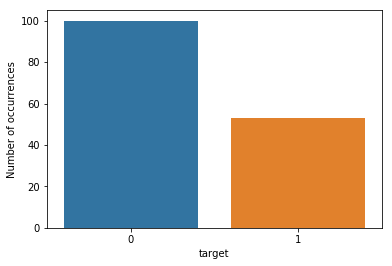

In [478]:
# Target 分布，看看各类样本分布是否均衡
sns.countplot(y_test);
plt.xlabel('target');
plt.ylabel('Number of occurrences');

## 模型训练

### default Logistic Regression

In [479]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [480]:
# 交叉验证用于评估模型性能和进行参数调优（模型选择）
#分类任务中交叉验证缺省是采用StratifiedKFold
from sklearn.cross_validation import cross_val_score
loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')

In [481]:
print ('logloss of each fold is: ',-loss)
print ('cv logloss is:', -loss.mean())

logloss of each fold is:  [0.52356139 0.44870663 0.48221085 0.49710392 0.4634096 ]
cv logloss is: 0.4829984760018508


### 正则化的 Logistic Regression及参数调优

logistic回归的需要调整超参数有：C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 
目标函数为：J = sum(logloss(f(xi), yi)) + C* penalty 

在sklearn框架下，不同学习器的参数调整步骤相同：
设置候选参数集合
调用GridSearchCV
调用fit

In [482]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数
# 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [483]:
# view the complete results (list of named tuples)
grid.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([0.00120363, 0.00160317, 0.00320678, 0.00140543, 0.00460434,
        0.00060148, 0.0093823 , 0.        , 0.01070094, 0.0012033 ,
        0.00938287, 0.00372014, 0.00625482, 0.00312586]),
 'mean_score_time': array([0.00110846, 0.00100937, 0.00080199, 0.00059891, 0.0012104 ,
        0.00030055, 0.        , 0.00312552, 0.00079861, 0.0004014 ,
        0.        , 0.00010033, 0.        , 0.        ]),
 'mean_test_score': array([-0.65386773, -0.58650348, -0.59485166, -0.58032489, -0.53906156,
        -0.55299918, -0.46249839, -0.48301907, -0.46189208, -0.46194586,
        -0.46194524, -0.46179567, -0.46196491, -0.46180857]),
 'mean_train_score': array([-0.65188398, -0.57648494, -0.5863997 , -0.56983462, -0.52860479,
        -0.54274024, -0.45017246, -0.47302091, -0.44868991, -0.44968349,
        -0.44867181, -0.44868487, -0.44867125, -0.44867374]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000

In [484]:
# examine the best model
print(-grid.best_score_)
print(grid.best_params_)

0.4617956704790646
{'C': 100, 'penalty': 'l2'}


如果最佳值在候选参数的边缘，最好再尝试更大的候选参数或更小的候选参数，直到找到拐点。
l2, c=100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


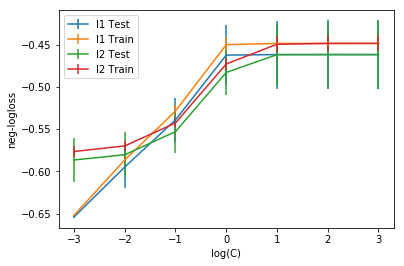

In [485]:
# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    plt.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    plt.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'neg-logloss' )
plt.savefig('LogisticGridSearchCV_C.png' )

plt.show()

上图给出了L1正则和L2正则下、不同正则参数C对应的模型在训练集上测试集上的正确率（score）。可以看出在训练集上C越大（正则越少）的模型性能越好；但在测试集上当C=100时性能最好（L1正则和L2正则均是）

### 用LogisticRegressionCV实现正则化的 Logistic Regression

### L1正则

In [486]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]

# 大量样本（6W+）、高维度（93），L1正则 --> 可选用saga优化求解器(0.19版本新功能)
# LogisticRegressionCV比GridSearchCV快
lrcv_L1 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l1', solver='liblinear')
lrcv_L1.fit(X_train, y_train)    

LogisticRegressionCV(Cs=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
           class_weight=None, cv=5, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l1', random_state=None, refit=True,
           scoring='neg_log_loss', solver='liblinear', tol=0.0001,
           verbose=0)

In [487]:
lrcv_L1.scores_

{1: array([[-0.69314718, -0.69314718, -0.69314718, -0.65291717, -0.6419474 ,
         -0.58954543],
        [-0.69314718, -0.69314718, -0.69314718, -0.65376347, -0.57451958,
         -0.51479101],
        [-0.69314718, -0.69314718, -0.69314718, -0.65523643, -0.59151831,
         -0.53403958],
        [-0.69314718, -0.69314718, -0.69314718, -0.65508753, -0.58384079,
         -0.53096967],
        [-0.69314718, -0.69314718, -0.69314718, -0.65234634, -0.58197893,
         -0.52560376]])}

In [488]:
lrcv_L1.coef_

array([[ 0.08012272,  0.02803487, -0.04144378, -0.00597509, -0.00049513,
         0.05016566,  0.        ,  0.01006377]])

一个稀疏系数

### L2正则

In [489]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1, 10,100,1000]

# 大量样本（6W+）、高维度（93），L2正则 --> 缺省用lbfgs，为了和GridSeachCV比较，也用liblinear

lr_cv_L2 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l2', solver='liblinear', multi_class='ovr')
lr_cv_L2.fit(X_train, y_train)    

LogisticRegressionCV(Cs=[1, 10, 100, 1000], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [490]:
lr_cv_L2.scores_

{1: array([[-0.52356139, -0.50512379, -0.50681587, -0.50715286],
        [-0.44870663, -0.41432328, -0.41002969, -0.40963058],
        [-0.48221085, -0.46190939, -0.46237406, -0.46278324],
        [-0.49710392, -0.49972243, -0.50575735, -0.50591431],
        [-0.4634096 , -0.42872387, -0.42411288, -0.42367483]])}

[-0.48299848 -0.46196055 -0.46181797 -0.46183116]


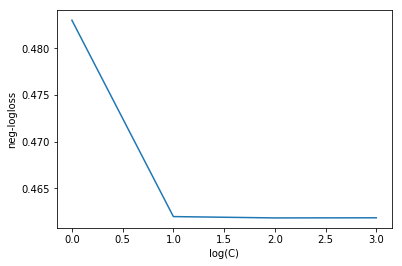

In [491]:
# dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)
n_classes = 1
scores =  np.zeros((n_classes,n_Cs))
print(np.mean(lr_cv_L2.scores_[1],axis = 0))

scores[0][:] = np.mean(lr_cv_L2.scores_[1],axis = 0)
    
mse_mean = -np.mean(scores, axis = 0)
plt.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
#plt.plot(np.log10(reg.Cs)*np.ones(3), [0.28, 0.29, 0.30])
plt.xlabel('log(C)')
plt.ylabel('neg-logloss')
plt.show()

#print ('C is:',lr_cv.C_)  #对多类分类问题，每个类别的分类器有一个C


In [492]:
#LinearSVC不能得到每类的概率，在Otto数据集要求输出每类的概率，这里只是示意SVM的使用方法
#https://xacecask2.gitbooks.io/scikit-learn-user-guide-chinese-version/content/sec1.4.html
#1.4.1.2. 得分与概率
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SVC1 = LinearSVC().fit(X_train, y_train)

In [493]:
#在校验集上测试，估计模型性能
y_predict = SVC1.predict(X_test)
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (SVC1, metrics.classification_report(y_test, y_predict)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_predict))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       0.65      1.00      0.79       100
          1       0.00      0.00      0.00        53

avg / total       0.43      0.65      0.52       153


Confusion matrix:
[[100   0]
 [ 53   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 线性SVM正则参数调优

线性SVM LinearSVC的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和正则函数penalty（L2/L1） 

采用交叉验证，网格搜索步骤与Logistic回归正则参数处理类似，在此略。

这里我们用校验集（X_val、y_val）来估计模型性能

In [494]:
def fit_grid_point_Linear(C, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC2 =  LinearSVC( C = C,penalty='l2')
    SVC2 = SVC2.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC2.score(X_val, y_val)
    
    print("accuracy: {}".format(accuracy))
    return accuracy

accuracy: 0.6666666666666666
accuracy: 0.6797385620915033
accuracy: 0.6993464052287581
accuracy: 0.6993464052287581
accuracy: 0.6993464052287581
accuracy: 0.6405228758169934
accuracy: 0.6535947712418301
accuracy: 0.7254901960784313
accuracy: 0.6666666666666666
accuracy: 0.5490196078431373


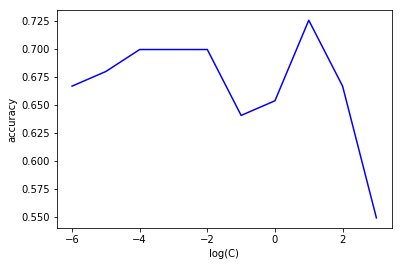

In [495]:
#需要调优的参数
C_s = np.logspace(-6, 3, 10)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份  
#penalty_s = ['l1','l2']

accuracy_s = []
for i, oneC in enumerate(C_s):
#    for j, penalty in enumerate(penalty_s):
    tmp = fit_grid_point_Linear(oneC, X_train, y_train, X_test, y_test)
    accuracy_s.append(tmp)

x_axis = np.log10(C_s)
#for j, penalty in enumerate(penalty_s):
plt.plot(x_axis, np.array(accuracy_s), 'b-')
    
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'accuracy' )
plt.savefig('SVM_Otto.png' )

plt.show()

### RBF核SVM正则参数调优

RBF核是SVM最常用的核函数。
RBF核SVM 的需要调整正则超参数包括C（正则系数，一般在log域（取log后的值）均匀设置候选参数）和核函数的宽度gamma
C越小，决策边界越平滑； 
gamma越小，决策边界越平滑。

采用交叉验证，网格搜索步骤与Logistic回归正则参数处理类似，在此略。

这里我们用校验集（X_val、y_val）来估计模型性能

In [496]:
from sklearn.svm import SVC

In [497]:
def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC3 =  SVC( C = C, kernel='rbf', gamma = gamma)
    SVC3 = SVC3.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC3.score(X_val, y_val)
    
    print("accuracy: {}".format(accuracy))
    return accuracy

In [498]:
#需要调优的参数
C_s = np.logspace(-6, 3, 10)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
gamma_s = np.logspace(-2, 2, 5)  

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_test, y_test)
        accuracy_s.append(tmp)

accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.673202614379085
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.653

从上述部分运行结果来看，gamma参数设置不合适（gamma越大，对应RBF核的sigma越小，决策边界更复杂，可能发生了过拟合）
所以调小gamma值

In [499]:
#需要调优的参数
C_s = np.logspace(-2, 3, 10)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
gamma_s = np.logspace(-5, -2, 4)  

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_test, y_test)
        accuracy_s.append(tmp)

accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.6535947712418301
accuracy: 0.673202614379085
accuracy: 0.7516339869281046
accuracy: 0.6928104575163399
accuracy: 0.6535947712418301
accuracy: 0.738562091503268
accuracy: 0.7712418300653595
accuracy: 0.7647058823529411
accuracy: 0.6666666666666666
accuracy: 0.7581699346405228
accuracy: 0.7581699346405228
accuracy: 0.7647058823529411
accuracy: 0.673202614379085
accuracy: 0.7647058823529411
accuracy: 0.7320261437908496
accuracy: 0.7516339869281046
accuracy: 0.6666666666666666
accuracy: 0.7712418300653595
accuracy: 0.7581699346405228
accuracy: 0.6993464052287581
accuracy: 0.673202614379085
accuracy: 0.7647058823529411
accuracy: 0.7581699346405228
accuracy: 0.6928104575163399
accuracy: 0.673202614379085
accuracy: 0.7843137254901961
accuracy: 0.7712418300653595
accuracy: 0.6666666

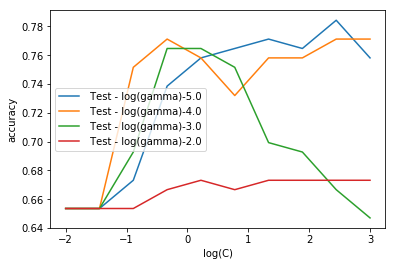

In [500]:
accuracy_s1 =np.array(accuracy_s).reshape(len(C_s),len(gamma_s))
x_axis = np.log10(C_s)
for j, gamma in enumerate(gamma_s):
    plt.plot(x_axis, np.array(accuracy_s1[:,j]), label = ' Test - log(gamma)' + str(np.log10(gamma)))

plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'accuracy' )
plt.savefig('RBF_SVM_Otto.png' )

plt.show()